In [17]:
import matplotlib.pylab as plt
import shap
import pandas as pd
import numpy as np
import pickle

## SHAP summary plot

In [2]:
model_name = 'NHANES_5_year'

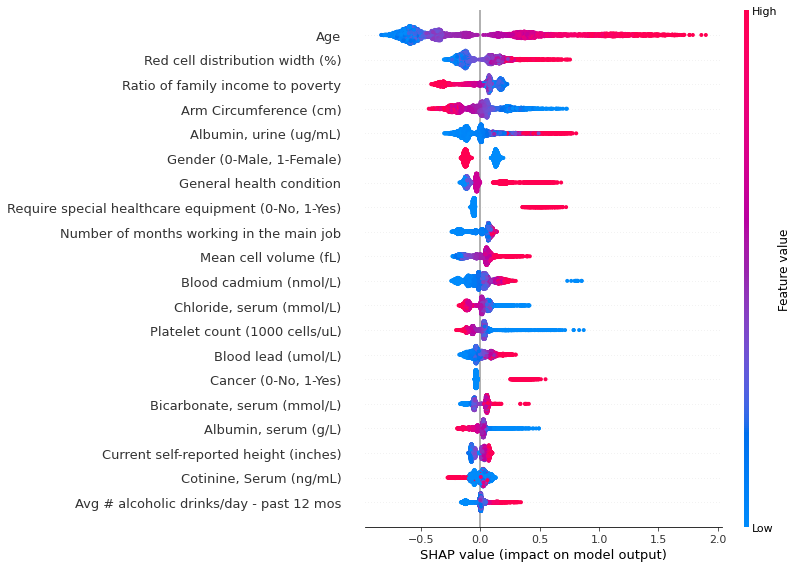

In [4]:
fore_data = pd.read_csv('./model/'+model_name+'/fore_data.csv')
shap_values = np.load('./model/'+model_name+'/shap_values.npy')
display_name = pd.read_csv('./data/NHANES/NHANES_feature_list_Display_name.csv')
display_col = []
for col in fore_data.columns:
    display_col.append(list(display_name.loc[display_name['Type_Short_Name']==col, 'Display_Name'])[0])
col_dict = dict(zip(fore_data.columns, display_col))

change_0_1 = list(display_name.loc[display_name['Change_0_1']==1, 'Type_Short_Name'])
for fea in change_0_1:
    temp = fore_data[fea].copy()
    fore_data.loc[temp==1, fea] = 0
    fore_data.loc[temp==0, fea] = 1
fore_data = fore_data.rename(columns=col_dict)
shap.summary_plot(shap_values, fore_data, max_display=20, show=True)

## SHAP values plot

In [6]:
model_name = 'NHANES_5_year'
feature = 'Examination_ArmCircum'

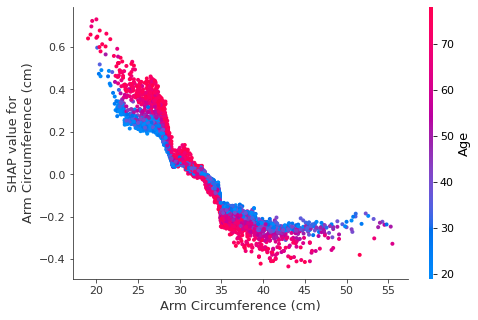

In [8]:
fore_data = pd.read_csv('./model/'+model_name+'/fore_data.csv')
shap_values = np.load('./model/'+model_name+'/shap_values.npy')
display_name = pd.read_csv('./data/NHANES/NHANES_feature_list_Display_name.csv')
display_col = []
for col in fore_data.columns:
    display_col.append(list(display_name.loc[display_name['Type_Short_Name']==col, 'Display_Name'])[0])
col_dict = dict(zip(fore_data.columns, display_col))

change_0_1 = list(display_name.loc[display_name['Change_0_1']==1, 'Type_Short_Name'])
for fea in change_0_1:
    temp = fore_data[fea].copy()
    fore_data.loc[temp==1, fea] = 0
    fore_data.loc[temp==0, fea] = 1
fore_data = fore_data.rename(columns=col_dict)
shap.dependence_plot(col_dict[feature], shap_values, fore_data, show=True, feature_names=display_col, interaction_index=col_dict['Demographics_Age'])

## SHAP main effect plot

In [12]:
model_name = 'NHANES_5_year'
feature = 'Laboratory_RedCellDistributionWidth'

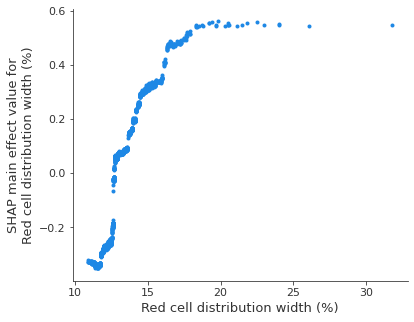

In [13]:
fore_data = pd.read_csv('./model/'+model_name+'/fore_data.csv')
shap_inter_values = np.load('./model/'+model_name+'/shap_interaction_values.npy')
display_name = pd.read_csv('./data/NHANES/NHANES_feature_list_Display_name.csv')
display_col = []
for col in fore_data.columns:
    display_col.append(list(display_name.loc[display_name['Type_Short_Name']==col, 'Display_Name'])[0])
col_dict = dict(zip(fore_data.columns, display_col))

change_0_1 = list(display_name.loc[display_name['Change_0_1']==1, 'Type_Short_Name'])
for fea in change_0_1:
    temp = fore_data[fea].copy()
    fore_data.loc[temp==1, fea] = 0
    fore_data.loc[temp==0, fea] = 1
fore_data = fore_data.rename(columns=col_dict)
shap.dependence_plot((col_dict[feature], col_dict[feature]), shap_inter_values, fore_data, show=False, feature_names=display_col, interaction_index=None)

## SHAP interaction plot

In [14]:
model_name = 'NHANES_5_year'
feature = 'Laboratory_Chloride'

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


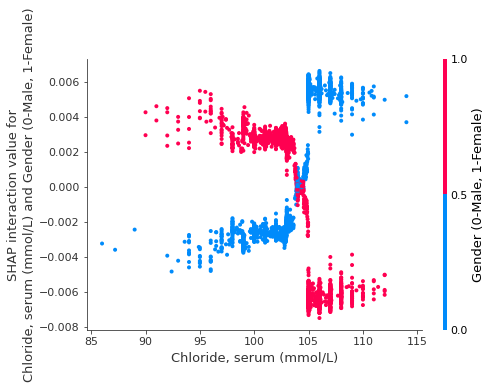

In [16]:
fore_data = pd.read_csv('./model/'+model_name+'/fore_data.csv')
shap_inter_values = np.load('./model/'+model_name+'/shap_interaction_values.npy')
display_name = pd.read_csv('./data/NHANES/NHANES_feature_list_Display_name.csv')
display_col = []
for col in fore_data.columns:
    display_col.append(list(display_name.loc[display_name['Type_Short_Name']==col, 'Display_Name'])[0])
col_dict = dict(zip(fore_data.columns, display_col))

change_0_1 = list(display_name.loc[display_name['Change_0_1']==1, 'Type_Short_Name'])
for fea in change_0_1:
    temp = fore_data[fea].copy()
    fore_data.loc[temp==1, fea] = 0
    fore_data.loc[temp==0, fea] = 1
fore_data = fore_data.rename(columns=col_dict)
shap.dependence_plot((col_dict[feature], col_dict['Demographics_Gender_2.0']), shap_inter_values, fore_data, feature_names=display_col, show=True)

## SHAP individualized plot

In [21]:
model_name = 'NHANES_5_year'
idx = 0

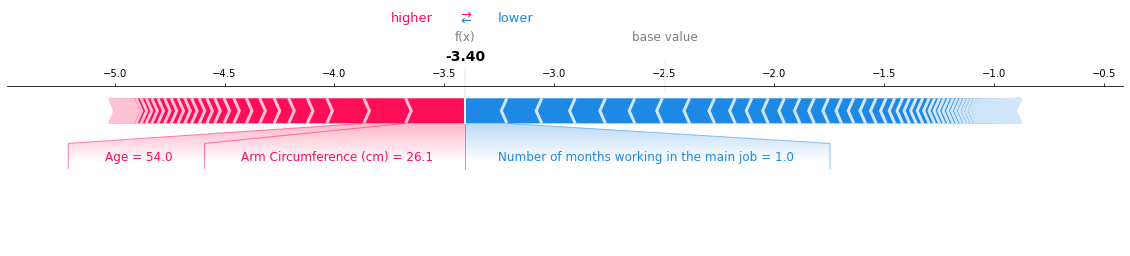

In [22]:
fore_data = pd.read_csv('./model/'+model_name+'/fore_data.csv')
shap_values = np.load('./model/'+model_name+'/shap_values.npy')
display_name = pd.read_csv('./data/NHANES/NHANES_feature_list_Display_name.csv')
model = pickle.load(open('./model/'+model_name+'/model.pickle.dat', "rb"))
display_col = []
for col in fore_data.columns:
    display_col.append(list(display_name.loc[display_name['Type_Short_Name']==col, 'Display_Name'])[0])
col_dict = dict(zip(fore_data.columns, display_col))

change_0_1 = list(display_name.loc[display_name['Change_0_1']==1, 'Type_Short_Name'])
for fea in change_0_1:
    temp = fore_data[fea].copy()
    fore_data.loc[temp==1, fea] = 0
    fore_data.loc[temp==0, fea] = 1
fore_data = fore_data.rename(columns=col_dict)
explainer = shap.TreeExplainer(model)
shap.force_plot(explainer.expected_value, shap_values[idx,:], fore_data.iloc[idx,:], matplotlib=True, feature_names=display_col, show=True, text_rotation=0)

## Partial dependence plot (reference interval)

In [23]:
def model_proba(x):
    return model.predict_proba(x)[:,1]
def model_relative_proba(x):
    return model.predict_proba(x)[:,1]/expected_proba
def model_logodds(x):
    return model.predict(x, output_margin=True)
def model_odds(x):
    return np.exp(model.predict(x, output_margin=True))
def logodds_proba(x):
    return np.exp(x)/(1+np.exp(x))
def proba_logodds(x):
    return np.log(x/(1-x))
def odds_proba(x):
    return x/(1+x)
def logodds_odds(x):
    return np.exp(x)
def odds_logodds(x):
    return np.log(x)

In [24]:
RI_dict = pickle.load(open("./data/NHANES/NHANES_reference_interval_dict.pkl", "rb"))

In [27]:
model_name = 'NHANES_5_year'
feature = 'Laboratory_GammeGlutamylTransferase'

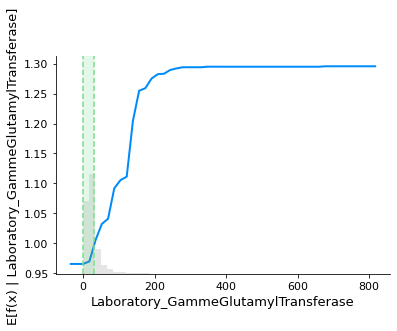

In [31]:
lower_bound = float(RI_dict[feature]['RI_all'].split('-')[0])
upper_bound = float(RI_dict[feature]['RI_all'].split('-')[1])
model = pickle.load(open('./model/'+model_name+'/model.pickle.dat', "rb"))
data = pd.read_csv('./model/'+model_name+'/fore_data.csv')[model.get_booster().feature_names]

display_name = pd.read_csv('./data/NHANES/NHANES_feature_list_Display_name.csv')
display_col=[]
for col in data.columns:
    display_col.append(list(display_name.loc[display_name['Type_Short_Name']==col, 'Display_Name'])[0])
col_dict = dict(zip(data.columns, display_col))


expected_proba = model_proba(data).mean()
shap.partial_dependence_plot(
        feature, model_relative_proba, data, model_expected_value=False, npoints=50, 
        feature_expected_value=False, show=False, ice=False, 
    )

plt.axvline(x=lower_bound, color='#78e08f', linestyle='--')
plt.axvline(x=upper_bound, color='#78e08f', linestyle='--')
plt.axvspan(lower_bound, upper_bound, color='#78e08f', alpha=0.2, lw=0)
plt.show()

## model comparison plot

In [35]:
def Gabe_plot_part(shap_values_A, cols_A, shap_values_B, cols_B, fea_num, A_name, B_name):
    fig = plt.figure(figsize=(4, 8))  #(15, 20), (4,8), (5,8)
    ax1 = fig.add_subplot(111)
    
    cols_sorted_A = cols_A[np.argsort(-np.sum(np.abs(shap_values_A), axis=0))]
    cols_sorted_B = cols_B[np.argsort(-np.sum(np.abs(shap_values_B), axis=0))]
    
    cols_sorted_A = list(cols_sorted_A[0:fea_num][::-1])
    cols_sorted_B = list(cols_sorted_B[0:fea_num][::-1])
    print('top 20 of left', cols_sorted_A[-20])
    print('top 20 of right', cols_sorted_B[-20])
    display_name = pd.read_csv('./data/NHANES/NHANES_feature_list_Display_name.csv')
    print('A top 20 features:')
    for i in range(len(cols_sorted_A)):
        cols_sorted_A[i] = (list(display_name.loc[display_name['Type_Short_Name']==cols_sorted_A[i], 'Short_Display_Name'])[0])
    for i in range(len(cols_sorted_A)):
        print(cols_sorted_A[len(cols_sorted_A)-i-1])
    print('\nB top 20 features:')
    for i in range(len(cols_sorted_B)):
        cols_sorted_B[i] = (list(display_name.loc[display_name['Type_Short_Name']==cols_sorted_B[i], 'Short_Display_Name'])[0])
    for i in range(len(cols_sorted_B)):
        print(cols_sorted_B[len(cols_sorted_B)-i-1])
    
    dict_A = dict(zip(cols_sorted_A, [i+1 for i in range(1, fea_num+1)]))
    dict_B = dict(zip(cols_sorted_B, [i+1 for i in range(1, fea_num+1)]))
    cols_sorted_A.insert(0, 'Other features')
    cols_sorted_B.insert(0, 'Other features')
    cols_sorted_A.append('')
    cols_sorted_B.append('')

    col_list = set(dict_A.keys()) | set(dict_B.keys())
    print(col_list)
    for col in col_list:
        if col in dict_A.keys():
            if dict_A[col]>=(fea_num-18): #20-2
                if col not in dict_B.keys():
                    ax1.plot([0.01,.99], [dict_A[col], 1], alpha=.5, c='#ff0255') #red
                elif dict_B[col]>=(fea_num-18):
                    ax1.plot([0.01,.99], [dict_A[col], dict_B[col]], alpha=.5, c='#8c7ae6') #purple
                else:
                    ax1.plot([0.01,.99], [dict_A[col], dict_B[col]], alpha=.5, c='#ff0255') #red
            else:
                if col in dict_B.keys():
                    if dict_B[col]>=(fea_num-18):
                        ax1.plot([0.01,.99], [dict_A[col], dict_B[col]], alpha=.5, c='#018ae7') #blue
        else:
            if dict_B[col]>=(fea_num-18):
                ax1.plot([0.01,.99], [1, dict_B[col]], alpha=.5, c='#018ae7') #blue
    
    fontsize=15
    ax1.set_ylabel(A_name)
    ax1.set_ylim(0, fea_num+1)
    ax1.set_xlim(0, 1)
    ax1.set_yticks([i for i in range(1, fea_num+3)])
    ax1.set_yticklabels(cols_sorted_A, fontsize=fontsize)
    ax1.get_xaxis().set_visible(False)

    ax2 = ax1.twinx()  
    ax2.set_ylabel(B_name)
    ax2.set_ylim(0, fea_num+1)
    ax2.set_yticks([i for i in range(1, fea_num+3)])
    ax2.set_yticklabels(cols_sorted_B, fontsize=fontsize)
    plt.show()

top 20 of left Questionnaire_JobMonths
top 20 of right Laboratory_GlucoseSI
A top 20 features:
Age
Albumin, serum
Cholesterol, serum
Basophils percent
Albumin, urine
Chloride, serum
Blood lead
Red cell distribution width
Require special healthcare equipment
Ratio of family income to poverty
Gender
Arm Circumference
Lymphocyte percent
Blood mercury, total
Received Hepatitis B 3 dose series
Osmolality, serum
Potassium, serum
Red blood cell count
Upper Leg Length
Number of months working in the main job

B top 20 features:
Age
Red cell distribution width
Blood lead
Ratio of family income to poverty
Arm Circumference
Albumin, urine
Require special healthcare equipment
General health condition
Gender
Albumin, serum
Number of months working in the main job
Bicarbonate, serum
Mean cell volume
Gamma glutamyl transferase
Self-reported weight-age 25
Body Mass Index
Self-reported greatest weight
Globulin, serum
Cancer
Glucose, refrigerated serum
{'Ratio of family income to poverty', 'Lymphocyte p

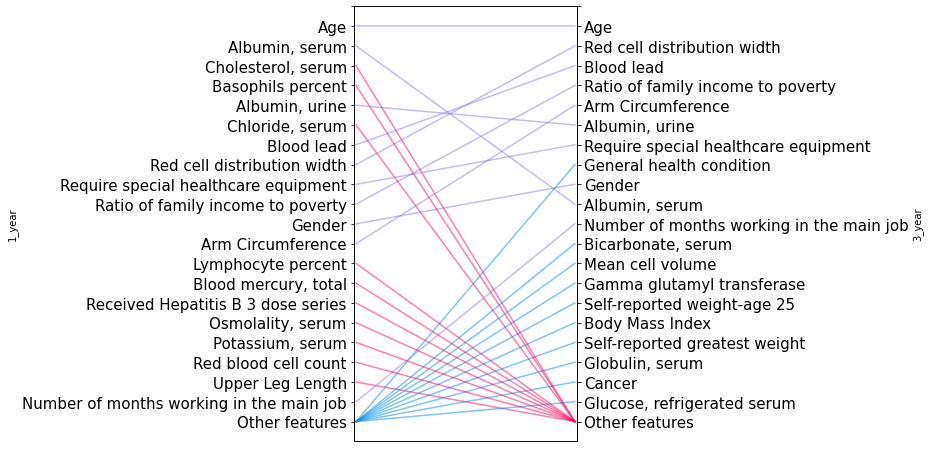

In [37]:
left_model = 'NHANES_1_year'
right_model = 'NHANES_3_year'
X_left = pd.read_csv('./model/'+left_model+'/fore_data.csv')
X_right = pd.read_csv('./model/'+right_model+'/fore_data.csv')
tree_shap_values_left = np.load('./model/'+left_model+'/shap_values.npy')
tree_shap_values_right = np.load('./model/'+right_model+'/shap_values.npy')
Gabe_plot_part(tree_shap_values_left, X_left.columns, tree_shap_values_right, X_right.columns, 20, '1_year', '3_year')